In [3]:
import pandas as pd
import numpy as np

In [6]:
train = pd.read_csv("train.csv",sep = ',')
store = pd.read_csv("store.csv",sep = ',')
test = pd.read_csv("test.csv",sep = ',')

In [7]:
rtrain,ctrain = train.shape
rtest,ctest = test.shape
rstore,cstore = store.shape
#print rtrain,ctrain
#print rtest,ctest
print rstore,cstore

1115 10


In [8]:
def pstr(df): 
    return df.shape, df.apply(lambda x: [x.unique()])

In [9]:
print pstr(train)

((1017209, 9), Store            [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
DayOfWeek                                  [[5, 4, 3, 2, 1, 7, 6]]
Date             [[2015-07-31, 2015-07-30, 2015-07-29, 2015-07-...
Sales            [[5263, 6064, 8314, 13995, 4822, 5651, 15344, ...
Customers        [[555, 625, 821, 1498, 559, 589, 1414, 833, 68...
Open                                                      [[1, 0]]
Promo                                                     [[1, 0]]
StateHoliday                                     [[0, a, b, c, 0]]
SchoolHoliday                                             [[1, 0]]
dtype: object)


In [10]:
print pstr(test)

((41088, 8), Id               [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
Store            [[1, 3, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 1...
DayOfWeek                                  [[4, 3, 2, 1, 7, 6, 5]]
Date             [[2015-09-17, 2015-09-16, 2015-09-15, 2015-09-...
Open                                             [[1.0, nan, 0.0]]
Promo                                                     [[1, 0]]
StateHoliday                                              [[0, a]]
SchoolHoliday                                             [[0, 1]]
dtype: object)


In [11]:
print pstr(store)

((1115, 10), Store                        [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1...
StoreType                                                       [[c, a, d, b]]
Assortment                                                         [[a, c, b]]
CompetitionDistance          [[1270.0, 570.0, 14130.0, 620.0, 29910.0, 310....
CompetitionOpenSinceMonth    [[9.0, 11.0, 12.0, 4.0, 10.0, 8.0, nan, 3.0, 6...
CompetitionOpenSinceYear     [[2008.0, 2007.0, 2006.0, 2009.0, 2015.0, 2013...
Promo2                                                                [[0, 1]]
Promo2SinceWeek              [[nan, 13.0, 14.0, 1.0, 45.0, 40.0, 26.0, 22.0...
Promo2SinceYear              [[nan, 2010.0, 2011.0, 2012.0, 2009.0, 2014.0,...
PromoInterval                [[nan, Jan,Apr,Jul,Oct, Feb,May,Aug,Nov, Mar,J...
dtype: object)


In [12]:
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [13]:
print test['Date'].head()

0   2015-09-17
1   2015-09-17
2   2015-09-17
3   2015-09-17
4   2015-09-17
Name: Date, dtype: datetime64[ns]


In [14]:
train = train.sort(['Date'],ascending = [1])
test = test.sort(['Date'],ascending = [1])

In [15]:
print train.describe()

                Store       DayOfWeek           Sales       Customers  \
count  1017209.000000  1017209.000000  1017209.000000  1017209.000000   
mean       558.429727        3.998341     5773.818972      633.145946   
std        321.908651        1.997391     3849.926175      464.411734   
min          1.000000        1.000000        0.000000        0.000000   
25%        280.000000        2.000000     3727.000000      405.000000   
50%        558.000000        4.000000     5744.000000      609.000000   
75%        838.000000        6.000000     7856.000000      837.000000   
max       1115.000000        7.000000    41551.000000     7388.000000   

                 Open           Promo   SchoolHoliday  
count  1017209.000000  1017209.000000  1017209.000000  
mean         0.830107        0.381515        0.178647  
std          0.375539        0.485759        0.383056  
min          0.000000        0.000000        0.000000  
25%          1.000000        0.000000        0.000000  
50%   

In [16]:
print test.describe()

                 Id         Store     DayOfWeek          Open         Promo  \
count  41088.000000  41088.000000  41088.000000  41077.000000  41088.000000   
mean   20544.500000    555.899533      3.979167      0.854322      0.395833   
std    11861.228267    320.274496      2.015481      0.352787      0.489035   
min        1.000000      1.000000      1.000000      0.000000      0.000000   
25%    10272.750000    279.750000      2.000000      1.000000      0.000000   
50%    20544.500000    553.500000      4.000000      1.000000      0.000000   
75%    30816.250000    832.250000      6.000000      1.000000      1.000000   
max    41088.000000   1115.000000      7.000000      1.000000      1.000000   

       SchoolHoliday  
count   41088.000000  
mean        0.443487  
std         0.496802  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  


In [17]:
print train.isnull().any().any()
print test.isnull().any().any()

False
True


In [18]:
col = test.columns
print test[test.isnull().any(axis=1)]

          Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
10751  10752    622          6 2015-09-05   NaN      0            0   
9039    9040    622          1 2015-09-07   NaN      0            0   
8183    8184    622          2 2015-09-08   NaN      0            0   
7327    7328    622          3 2015-09-09   NaN      0            0   
6471    6472    622          4 2015-09-10   NaN      0            0   
5615    5616    622          5 2015-09-11   NaN      0            0   
4759    4760    622          6 2015-09-12   NaN      0            0   
3047    3048    622          1 2015-09-14   NaN      1            0   
2191    2192    622          2 2015-09-15   NaN      1            0   
1335    1336    622          3 2015-09-16   NaN      1            0   
479      480    622          4 2015-09-17   NaN      1            0   

       SchoolHoliday  
10751              0  
9039               0  
8183               0  
7327               0  
6471               0  
5615     

In [19]:
#print test.loc[test['Store']==622,'Open']

In [20]:
test = test.fillna(1)

In [21]:
print train.columns
print test.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open', u'Promo', u'StateHoliday', u'SchoolHoliday'], dtype='object')
Index([u'Id', u'Store', u'DayOfWeek', u'Date', u'Open', u'Promo', u'StateHoliday', u'SchoolHoliday'], dtype='object')


In [22]:
train.loc[train['StateHoliday']==0,'StateHoliday']='0'

In [23]:
print train['StateHoliday'].unique()

['a' '0' 'b' 'c']


In [24]:
print pd.value_counts(train['StateHoliday'])/len(train)

0    0.969475
a    0.019917
b    0.006577
c    0.004031
dtype: float64


In [25]:
print train['SchoolHoliday'].unique()

[1 0]


In [26]:
print pd.value_counts(train['SchoolHoliday'])/len(train)

0    0.821353
1    0.178647
dtype: float64


In [27]:
#print train[train['Customers']==0]

In [28]:
%matplotlib inline
from ggplot import *


stat_bin: binwidth defaulted to range/30.
    Use 'binwidth = x' to adjust this.


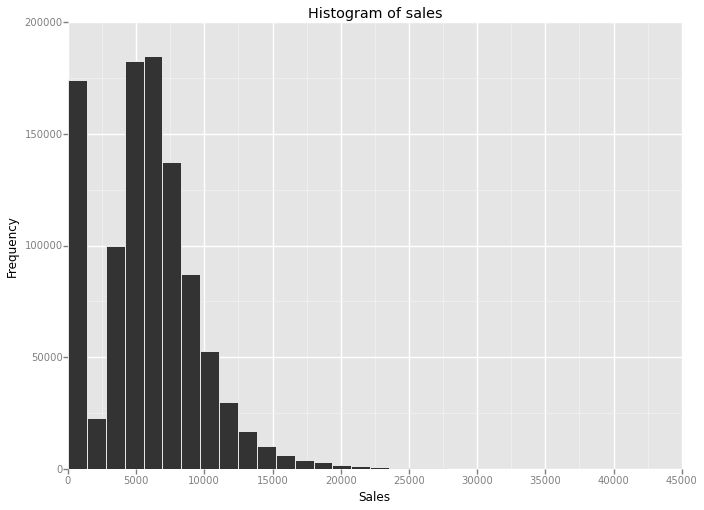

<ggplot: (286756769)>

In [29]:
p = ggplot(aes(x="Sales"),data = train)
p+geom_histogram()+ggtitle("Histogram of sales")+labs("Sales","Frequency")

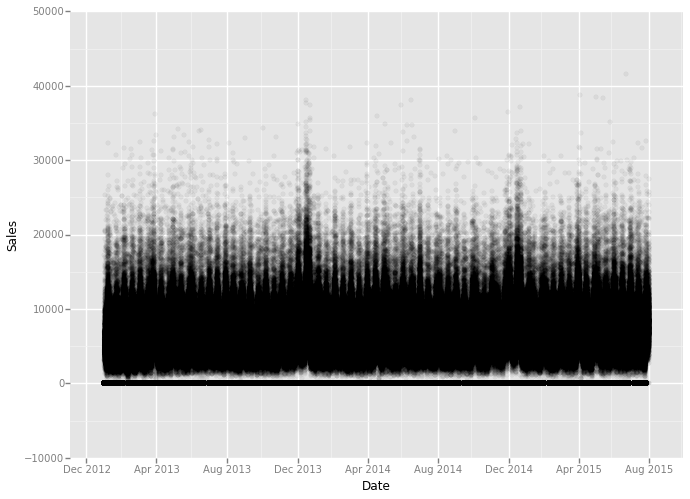

<ggplot: (276578769)>

In [30]:
p = ggplot(aes(x="Date",y="Sales"),data = train)
p+geom_point(alpha=1/20.)

In [130]:
p = ggplot(aes(x="Date",y="Sales",colour='SchoolHoliday'),data = train.loc[train['SchoolHoliday']!='0',['Date','Sales','SchoolHoliday']])
p+geom_point(alpha=1/20.)

TypeError: invalid type comparison

In [31]:
print train.loc[train["Open"]==1].count()/len(train)
p = ggplot(aes(x="Open"),data = train[])
p + geom_bar()

SyntaxError: invalid syntax (<ipython-input-31-9aab99cbf017>, line 2)

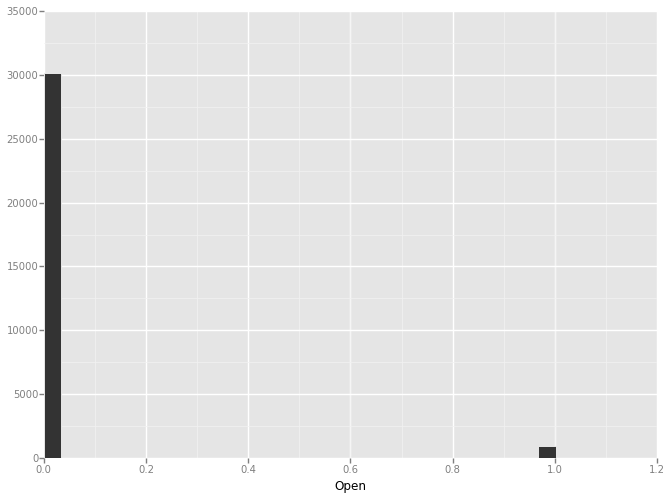

<ggplot: (276578789)>

In [32]:
p = ggplot(aes(x="Open"),data = train[train["StateHoliday"]!='0'])
p + geom_bar()

/usr/local/lib/python2.7/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


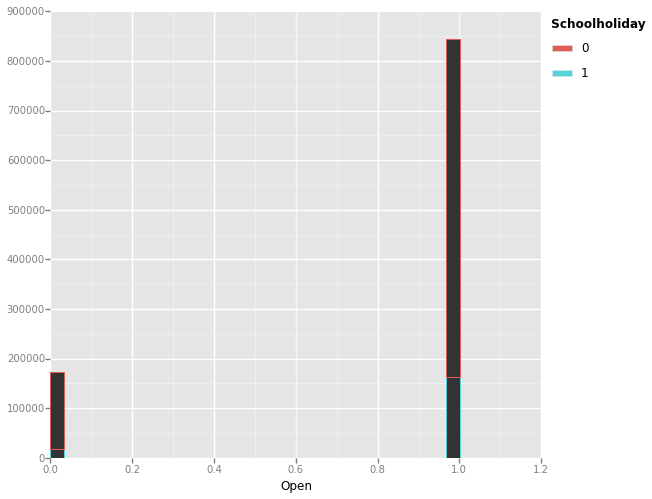

<ggplot: (284860089)>

In [33]:
p = ggplot(aes(x="Open",color = "SchoolHoliday"),data = train)
p + geom_bar()

In [34]:
print train["DayOfWeek"].unique()

[2 3 4 5 6 7 1]


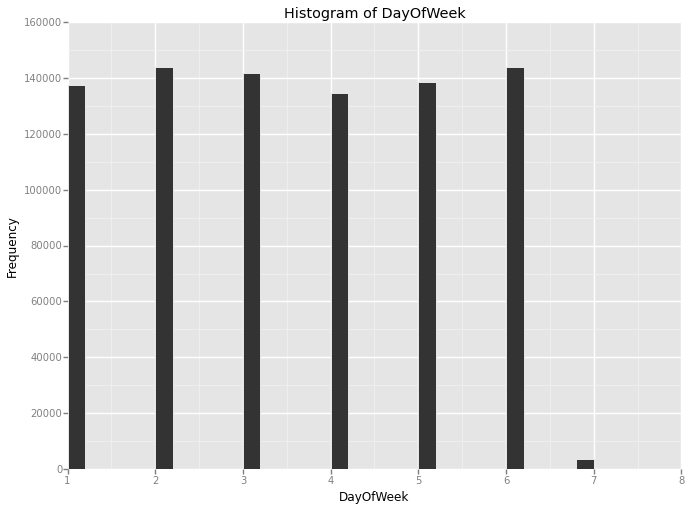

<ggplot: (284905773)>

In [35]:
p = ggplot(aes(x="DayOfWeek"),data = train[train["Open"]==1])
p+geom_histogram()+ggtitle("Histogram of DayOfWeek")+labs("DayOfWeek","Frequency")

A variable was mapped to y.
    stat_bin sets the y value to the count of cases in each group.
    The mapping to y was ignored.
    If you want y to represent values in the data, use stat="bar".


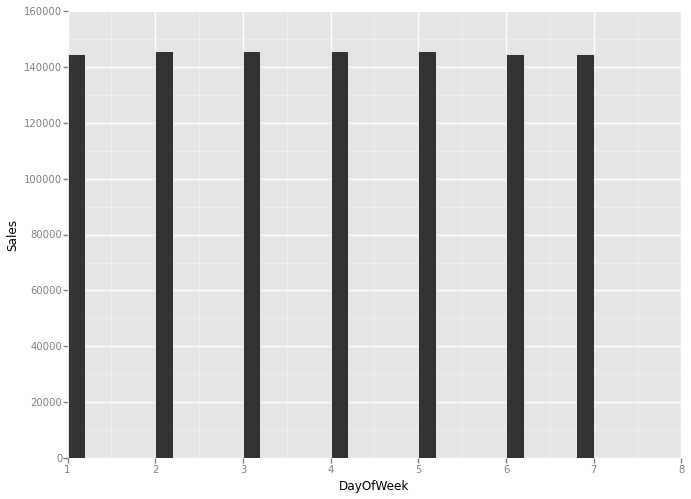

<ggplot: (285108985)>

In [36]:
p = ggplot(aes(x="DayOfWeek",y="Sales"),data = train)
p+geom_bar()

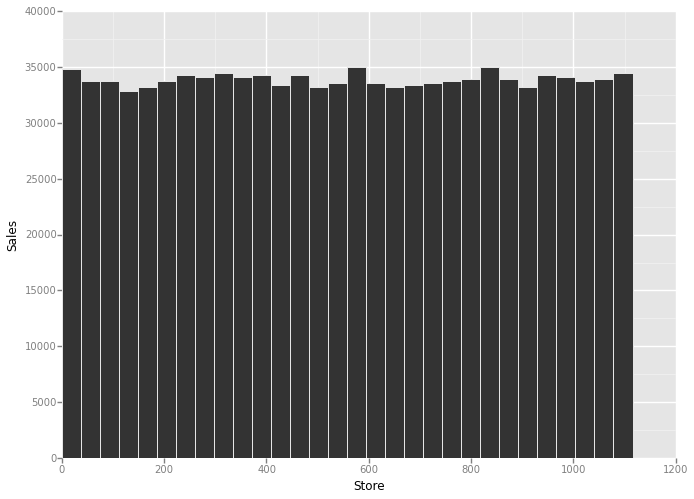

<ggplot: (285172321)>

In [37]:
p = ggplot(aes(x="Store",y="Sales"),data = train)
p+geom_bar()

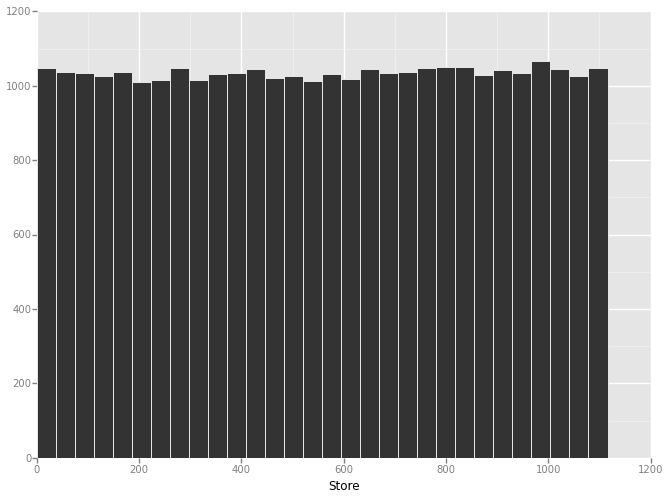

<ggplot: (292713565)>

In [38]:
p = ggplot(aes(x="Store"),data = train[train["StateHoliday"]!='0'])
p+geom_bar()

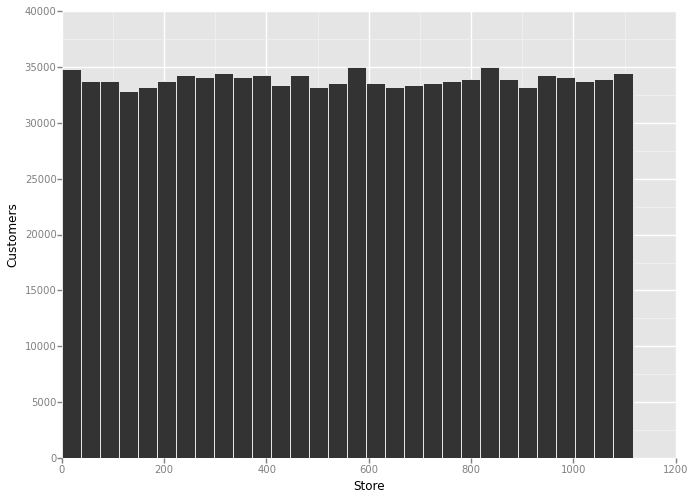

<ggplot: (292730253)>

In [39]:
p = ggplot(aes(x="Store",y="Customers"),data = train)
p+geom_bar()

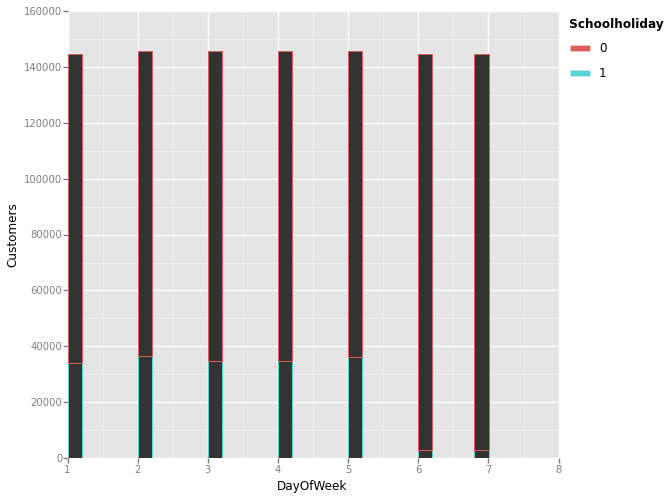

<ggplot: (292845553)>

In [40]:
p = ggplot(aes(y="Customers",x= "DayOfWeek",color = "SchoolHoliday"),data=train)
p + geom_bar() 

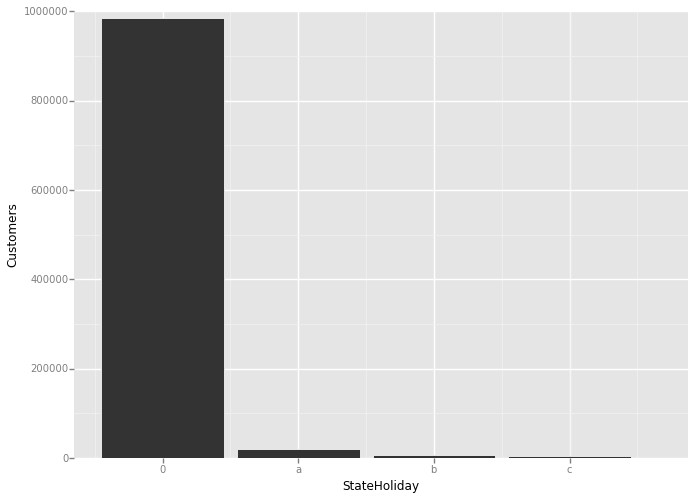

<ggplot: (292845485)>

In [41]:
p = ggplot(aes(y="Customers",x= "StateHoliday"),data=train)
p + geom_bar() 

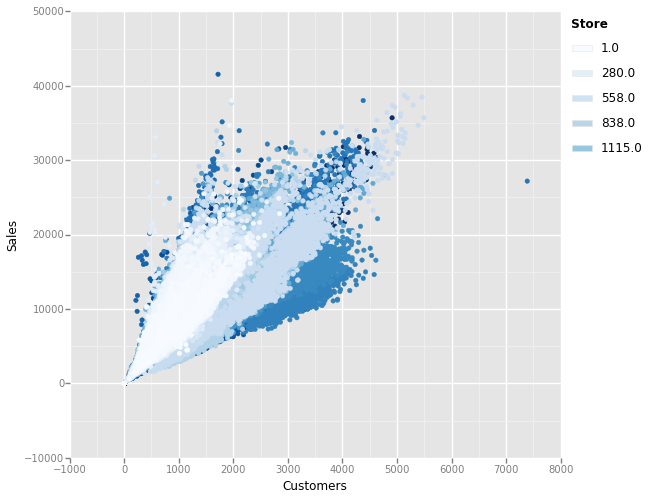

<ggplot: (380613797)>

In [126]:
p = ggplot(aes(x="Customers",y="Sales",color = "Store"),data = train)
p+geom_point()

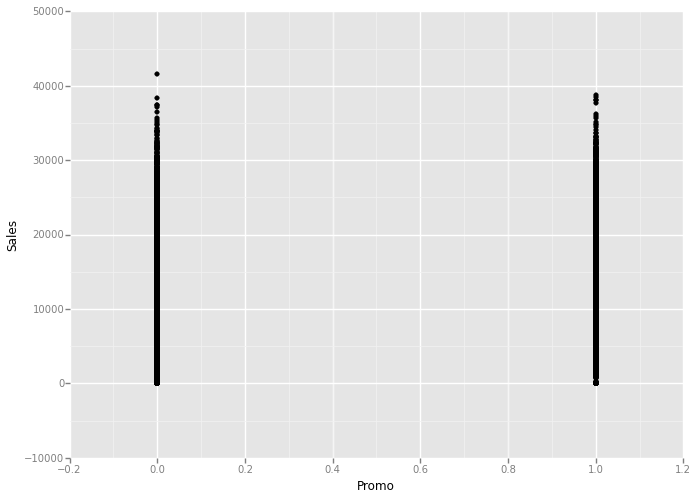

<ggplot: (331727321)>

In [183]:
q = ggplot(aes(x="Promo",y = "Sales"),data = train)
q+geom_point()

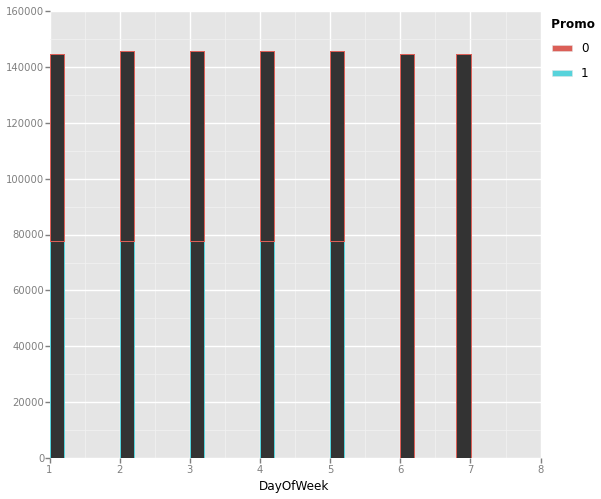

<ggplot: (292845481)>

In [43]:
p = ggplot(aes(x="DayOfWeek",color = "Promo"),data= train)
p + geom_bar()

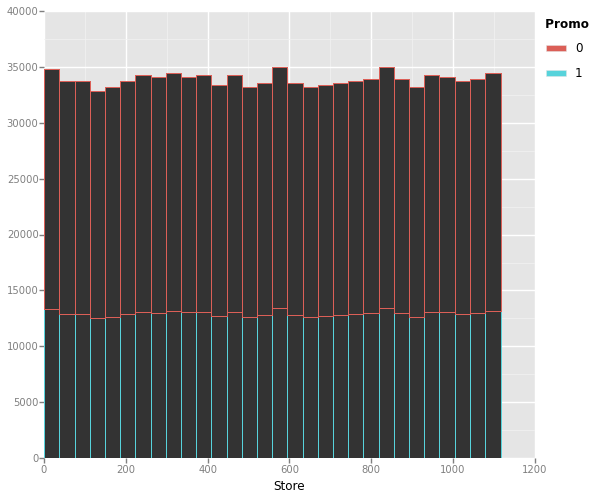

<ggplot: (294680505)>

In [44]:
p = ggplot(aes(x="Store",color = "Promo"),data= train)
p + geom_bar()

In [45]:
print train.groupby('DayOfWeek')

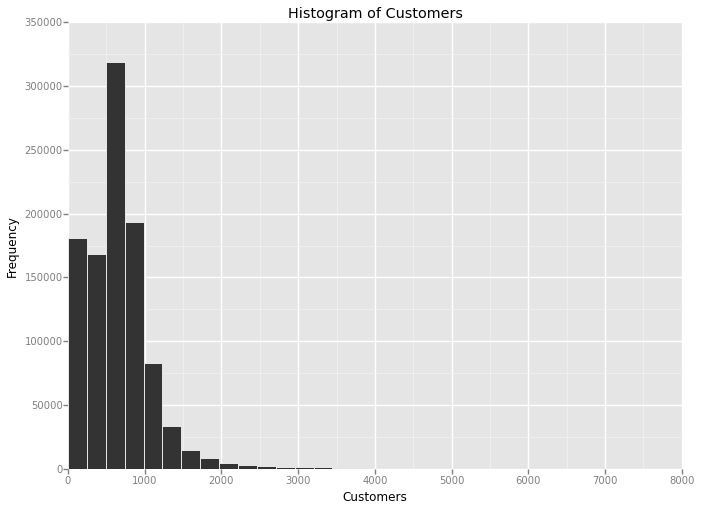

<ggplot: (295122929)>

In [46]:
p = ggplot(aes(x="Customers"),data = train)
p+geom_histogram()+ggtitle("Histogram of Customers")+labs("Customers","Frequency")

In [48]:
print len(store)

1115


In [55]:
print train[["Store","Customers"]].head()

         Store  Customers
1017208   1115          0
1016473    379          0
1016472    378          0
1016471    377          0
1016470    376          0


In [56]:
a =  train[["Store","Customers"]].groupby('Store').agg('mean')

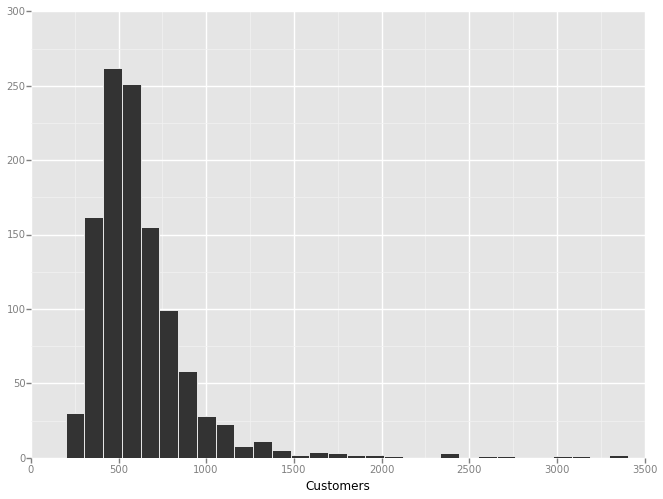

<ggplot: (310424585)>

In [61]:
p = ggplot(aes(x="Customers"),data = a)
p+geom_histogram()

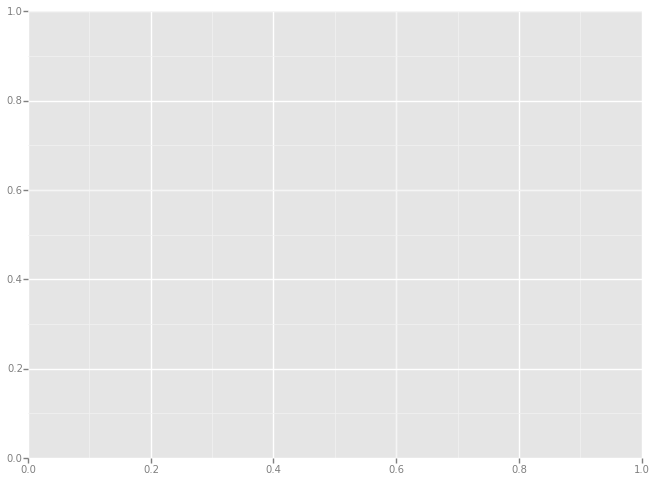

<ggplot: (341280533)>

In [67]:
p = ggplot(aes(x="SchoolHoliday",y="Sales"),data= train[train["Sales"]!=0])
#p + geom_jitter(alpha = 0.1)
p 
#+ geom_boxplot(color = "yellow")

In [66]:
#train[train["Sales"]!=0]

In [68]:
print store.head()

   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                         12   
3      4         c          c                  620                          9   
4      5         a          a                29910                          4   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                      2008       0              NaN              NaN   
1                      2007       1               13             2010   
2                      2006       1               14             2011   
3                      2009       0              NaN              NaN   
4                      2015       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,

In [92]:
p = ggplot(aes(x="CompetitionOpenSinceYear"), data = store[store["CompetitionOpenSinceYear"].isnull()!=True].groupby("CompetitionOpenSinceYear").agg("count"))
p + geom_histogram()
#test.isnull().any(axis=1)

Exception: Could not evaluate the 'x' mapping: 'CompetitionOpenSinceYear' (original error: name 'CompetitionOpenSinceYear' is not defined)

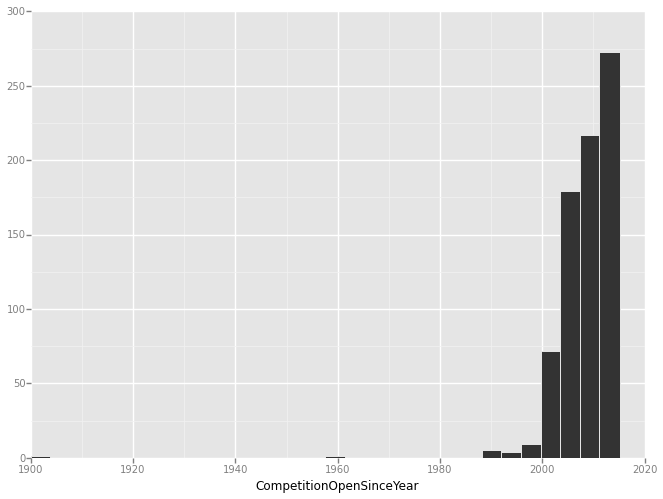

<ggplot: (380499933)>

In [124]:
a = store.loc[store["CompetitionOpenSinceYear"].isnull()!=True]
p = ggplot(aes(x ="CompetitionOpenSinceYear"),data = a)
p + geom_histogram()

In [127]:
print train.head()

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017208   1115          2 2013-01-01      0          0     0      0   
1016473    379          2 2013-01-01      0          0     0      0   
1016472    378          2 2013-01-01      0          0     0      0   
1016471    377          2 2013-01-01      0          0     0      0   
1016470    376          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  
1017208            a              1  
1016473            a              1  
1016472            a              1  
1016471            a              1  
1016470            a              1  


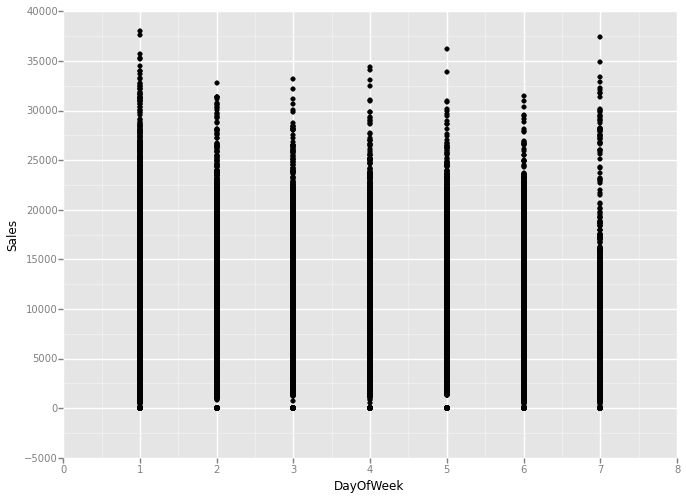

<ggplot: (366672925)>

In [144]:
train['Year'] = train['Date'].map(lambda x:x.year)
p = ggplot(aes(x="DayOfWeek",y="Sales"), data =train[train["Year"]==2013] )
p + geom_point()

In [145]:
a = train[train["Year"]==2013].groupby("DayOfWeek").agg("sum")
print a.columns

Index([u'Store', u'Sales', u'Customers', u'Open', u'Promo', u'SchoolHoliday', u'Year'], dtype='object')


In [146]:
print train.head()
print store.head()

         Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
1017208   1115          2 2013-01-01      0          0     0      0   
1016473    379          2 2013-01-01      0          0     0      0   
1016472    378          2 2013-01-01      0          0     0      0   
1016471    377          2 2013-01-01      0          0     0      0   
1016470    376          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Year  
1017208            a              1  2013  
1016473            a              1  2013  
1016472            a              1  2013  
1016471            a              1  2013  
1016470            a              1  2013  
   Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a                 1270                          9   
1      2         a          a                  570                         11   
2      3         a          a                14130                

In [149]:
print test.head()
print test.tail()

          Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  \
41087  41088   1115          6 2015-08-01     1      0            0   
40522  40523    378          6 2015-08-01     1      0            0   
40521  40522    377          6 2015-08-01     1      0            0   
40520  40521    373          6 2015-08-01     1      0            0   
40519  40520    372          6 2015-08-01     1      0            0   

       SchoolHoliday  
41087              1  
40522              0  
40521              0  
40520              0  
40519              0  
      Id  Store  DayOfWeek       Date  Open  Promo StateHoliday  SchoolHoliday
566  567    732          4 2015-09-17     1      1            0              0
565  566    731          4 2015-09-17     1      1            0              0
564  565    729          4 2015-09-17     1      1            0              0
562  563    727          4 2015-09-17     1      1            0              0
0      1      1          4 2015-09-17   

41088
